# Hyperparameter optimization for kNN algorithm

In the following we apply the kNN classifier to a simple data set with failure/success categories and seek to optimize the hyperparameter of the model. This is k, the number of neighbors. We do this via defining a pipeline and mounting grid search on top of this. 

For information on kNN, we refer to https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm. For information on grid search in python, we refer to https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998. 

Notice that throughout this notebook, we initially split the data set into a training (Train) and test (Test) set. The latter will be a hold out set. The former will then be used in the grid search via cross validation for the hyperparameter optimization. To this end, it is split into a training set (Train') and a test (Test') set where the latter is now used as a validation set in fact.

We also add a discussion of the confusion matrix and AUC score to further assess the quality of our optimized model.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [2]:
#define data frame
df = pd.read_csv("classification.csv")

#to trop columns 
#df = df.drop("name of column", axis = 1)

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
#define variables with train/test splitting (the test set here is a hold out set!!!)
X = df[["age", "interest"]].values
Y = df["success"].values #single brackets (!) needed for classification machine learling processing

#this step before building the pipleline is important to have training/validation/test data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [4]:
#step one: semi-automated pipeline
#define pipeline that combines StandardScaler with learning algorithm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

#allows us to adjust parameters on the level of the pipeline
pipeline.set_params(knn__n_neighbors = 2) #name before __ as in the pipeline

pipeline.fit(X_train, Y_train)

pipeline.score(X_test, Y_test)

0.9333333333333333

In [5]:
#step two: automated pipeline with gridsearch
#define pipeline that combines StandardScaler with learning algorithm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

#allows us to adjust parameters on the level of the pipeline
from sklearn.model_selection import GridSearchCV

#notice that GridSearchCV splits the data again for the hyperparameter optimization: training data -> training and validation data
classifier = GridSearchCV(pipeline, param_grid = {"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

#fit over the above-defined training data which is spli by GridSearchCV into training/ (hold out) validation data
classifier.fit(X_train, Y_train)

print("Hyperparameter setting that gave the best results on the (hold out) validation data: " + str(classifier.best_params_))

print("Test score with respect to (hold out) test set: " + str(classifier.score(X_test, Y_test)))

print("Mean cross-validated test score of the best_estimator: " + str(classifier.best_score_))

print("The number of cross-validation splits (folds/iterations): " + str(classifier.n_splits_))

Hyperparameter setting that gave the best results on the (hold out) validation data: {'knn__n_neighbors': 5}
Test score with respect to (hold out) test set: 0.9733333333333334
Mean cross-validated test score of the best_estimator: 0.9279279279279279
The number of cross-validation splits (folds/iterations): 3


/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [6]:
#Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data
classifier.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [7]:
#A data frame summarizing the gridsearch results
gridsearchsumdf = pd.DataFrame.from_dict(classifier.cv_results_)
gridsearchsumdf

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andreas/anaconda3/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001910,0.000566,0.001545,0.000302,1,{'knn__n_neighbors': 1},0.891892,0.878378,0.878378,0.882883,0.006370,10,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001864,0.000718,0.001505,0.000287,2,{'knn__n_neighbors': 2},0.891892,0.878378,0.891892,0.887387,0.006370,9,0.932432,0.932432,0.939189,0.934685,0.003185
2,0.001353,0.000041,0.001202,0.000017,3,{'knn__n_neighbors': 3},0.905405,0.945946,0.905405,0.918919,0.019111,3,0.959459,0.952703,0.966216,0.959459,0.005517
3,0.001198,0.000061,0.001166,0.000089,4,{'knn__n_neighbors': 4},0.891892,0.918919,0.905405,0.905405,0.011034,8,0.952703,0.939189,0.939189,0.943694,0.006370
4,0.001508,0.000553,0.001354,0.000346,5,{'knn__n_neighbors': 5},0.905405,0.959459,0.918919,0.927928,0.022969,1,0.966216,0.945946,0.945946,0.952703,0.009555
5,0.001244,0.000157,0.001093,0.000019,6,{'knn__n_neighbors': 6},0.918919,0.932432,0.918919,0.923423,0.006370,2,0.952703,0.939189,0.932432,0.941441,0.008427
6,0.001128,0.000013,0.001104,0.000004,7,{'knn__n_neighbors': 7},0.891892,0.945946,0.918919,0.918919,0.022067,3,0.939189,0.918919,0.945946,0.934685,0.011484
7,0.001123,0.000015,0.001113,0.000021,8,{'knn__n_neighbors': 8},0.918919,0.918919,0.905405,0.914414,0.006370,6,0.932432,0.939189,0.932432,0.934685,0.003185
8,0.001137,0.000024,0.001113,0.000006,9,{'knn__n_neighbors': 9},0.891892,0.932432,0.932432,0.918919,0.019111,3,0.932432,0.925676,0.932432,0.930180,0.003185
9,0.001139,0.000024,0.001190,0.000053,10,{'knn__n_neighbors': 10},0.905405,0.932432,0.905405,0.914414,0.012741,6,0.952703,0.945946,0.932432,0.943694,0.008427


Notice that in this table the scores for the splits are named e.g. split1_test_score and split1_train_score but are done on the original training data. So the test_score is in fact a validation score.

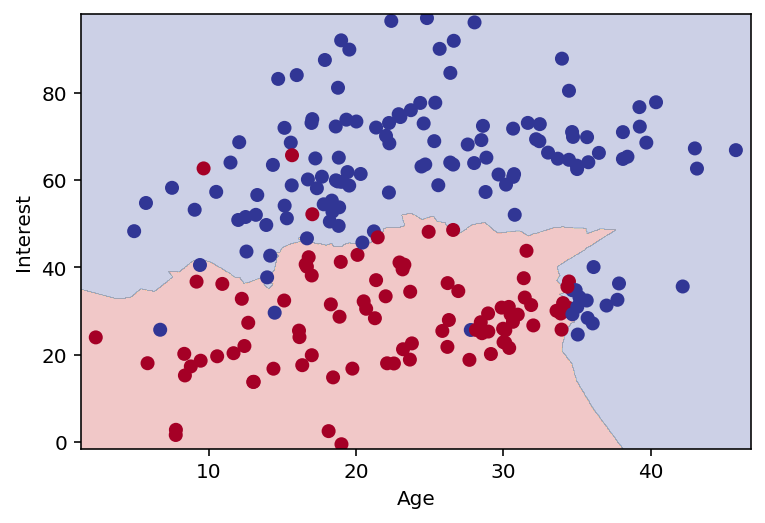

In [8]:
#visualizing the results for training and test sets
plot_classifier(classifier, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

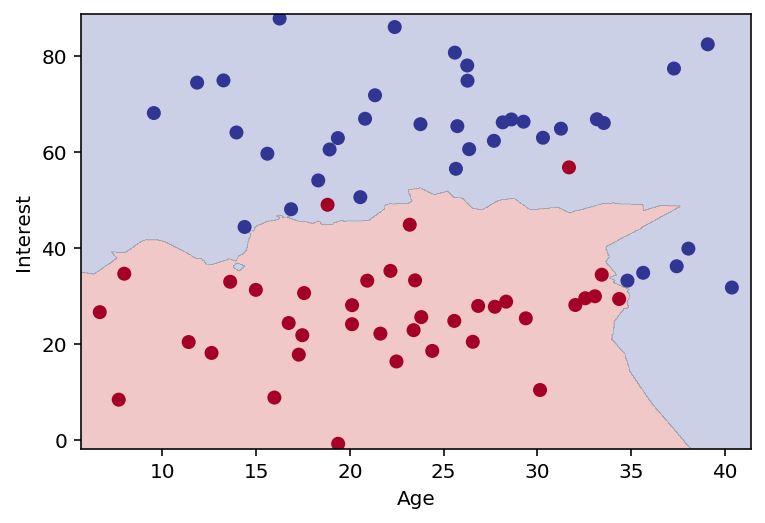

In [9]:
plot_classifier(classifier, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

### Confusion matrix and ROC curve

In the following we would like to explore two related concepts to further judge the quality of a classification model, i.e. find a way to quantify the misclassifications. This is done via the so-called confusion matrix and the ROC-curve/AUC-score which allow us to compute the true-positive and false-positive rates and compare them.

For further information regarding the confusion matrix, we refer to https://en.wikipedia.org/wiki/Confusion_matrix. 

The Receiver-operating-characteristic curve plots the true-postive rates over the false-positive rates for a respective model. The area-under-curve (AUC) is numerically obtained from the plot. The higher the value to 1 the better it is. For further information regarding these points, we refer to https://en.wikipedia.org/wiki/Receiver_operating_characteristic.

In [12]:
#introduce confusion matrix
from sklearn.metrics import confusion_matrix
Y_test_pred = classifier.predict(X_test)
confusion_matrix(Y_test, Y_test_pred)

array([[36,  2],
       [ 0, 37]])

In [13]:
#predict Y values according to respective model from test data X_test, output in terms of probabilities (as compared to model1.predict(X_test))
Y_test_pred = classifier.predict_proba(X_test)[:,1] #all lines of second column (1st and 2nd column are linearly dependent)

In [14]:
#introduce ROC curve and AUC score
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
#compute ROC curve
# false-positive rate, true-positive rate, threshold values
fpr, tpr, thresholds = roc_curve(Y_test,Y_test_pred)

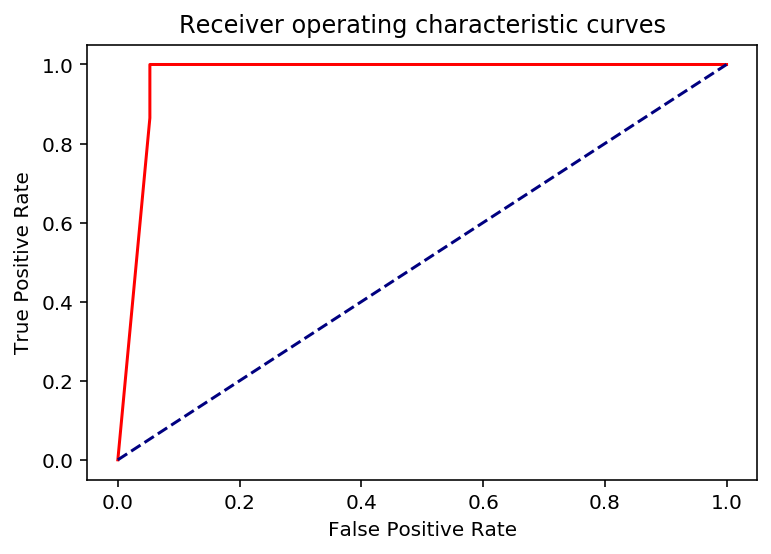

In [16]:
#plot ROC curve
#ideal curve would be step function
plt.plot(fpr, tpr, color = 'r')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.show()

In [17]:
print(roc_auc_score(Y_test,Y_test_pred))

0.9701280227596017


The ROC-curve can be used to distinguish the quality of models even further. As it seems, the optimized kNN model fits the data pretty well, according to the 2 score types (test score and auc score).